# CÁLCULO NUMÉRICO

## Zeros de Funções

In [1]:
import numpy as np                      #biblioteca de computação científica
import matplotlib.pyplot as plt         #biblioteca para a geração de gráficos 2D
import math                             #biblioteca de funções matemáticas

In [2]:
#Definindo a função
def f(x): return x**3 - 6*x - 3
def f_(x): return 3*x**2 - 6

### 1. Isolamento de Raízes

In [11]:
#Função para gerar o gráfico de uma função
def gerargraf(f, min=-5, max=5, n=1000):
    x = np.linspace(min,max,n)
    plt.plot(x,f(x))
    plt.grid()
    plt.show()

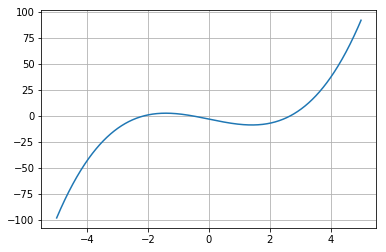

In [12]:
gerargraf(f)

In [13]:
# Função para identificação de intervalos contendo raízes
def isola(f,min=-100, max=100, n=100):
    for i in range(min,max+1,1):
        if np.sign(f(i)*f(i+1)) == -1:
            print('(%.2f, %.2f)' %(i,i+1))

In [21]:
isola(f)

(-3.00, -2.00)
(-1.00, 0.00)
(2.00, 3.00)


### 2. Refinamento

In [22]:
# Método da Bissecao
def bissecao(f, a, b, es=0.5, n=100):
    i = 1
    fa = f(a)
    fb = f(b)
    p = a
    #iteracao da bissecao
    print('{:<}{:^12}{:^8}{:^10}{:^8}{:^8}{:^10}{:^8}'.format('i','a','b','x','f(a)','f(b)','f(x)','ea'))
    while (i <= n):
        p0 = p
        p = a + (b-a)/2
        fp = f(p)
        ea = abs((p - p0)/p)*100
        print('%d %8.4f %8.4f %8.4f %8.4f %8.4f %8.4f %8.4f' %(i,a,b,p,fa,fb,fp,ea))
        #testando condicao de parada
        if fp == 0 or ea < es:
            return p  
        #bissecciona o intervalo
        i = i+1
        if (fa * fp > 0):
            a = p
            fa = fp
        else:
            b = p
            fb = fp
    raise NameError('Num. max. de iter. excedido!')

In [23]:
bissecao(f,2,3)

i     a         b        x       f(a)    f(b)     f(x)      ea   
1   2.0000   3.0000   2.5000  -7.0000   6.0000  -2.3750  20.0000
2   2.5000   3.0000   2.7500  -2.3750   6.0000   1.2969   9.0909
3   2.5000   2.7500   2.6250  -2.3750   1.2969  -0.6621   4.7619
4   2.6250   2.7500   2.6875  -0.6621   1.2969   0.2859   2.3256
5   2.6250   2.6875   2.6562  -0.6621   0.2859  -0.1959   1.1765
6   2.6562   2.6875   2.6719  -0.1959   0.2859   0.0430   0.5848
7   2.6562   2.6719   2.6641  -0.1959   0.0430  -0.0769   0.2933


2.6640625

In [24]:
# Método de Newton-Raphson
def newtonraphson(f, f_, x0, TOL=0.5, NMAX=100):
    n=1
    print('{:<}{:>7}{:>10}{:>10}'.format('i','x','f(x)','ea(%)'))
    while n<=NMAX:
        x1 = x0 - (f(x0)/f_(x0))
        y = f(x1)
        ea = abs((x1 - x0)/x1)*100
        print('%d %8.4f %8.4f %8.4f' %(n,x1,y,ea))
        if ea < TOL:
            return x1
        else:
            x0 = x1
        n += 1

In [25]:
newtonraphson(f,f_,2)

i      x      f(x)     ea(%)
1   3.1667   9.7546  36.8421
2   2.7616   1.4921  14.6666
3   2.6732   0.0640   3.3066
4   2.6691   0.0001   0.1554


2.66908806118047